La ecuación diferencial que rige el fenómeno es

\begin{equation}
    \ddot x + 2\lambda\dot x+\omega_0^2x=\frac{f}{m} cos (\gamma t) - \alpha x^2-\beta x^3
\end{equation}

y se analiza el caso particular en el que $\gamma=\omega_0+\epsilon$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
l=1
w=20
f=100
m=1
#eps=0.01
a=1
b=1


def func(Y,t):
    x,v=Y
    dx=v
    dv=-2*l*v-(w**2)*x+(f/m)*np.cos((w+eps)*t)-a*x**2-b*x**3
    return np.array([dx,dv])



In [3]:
T=np.linspace(0,50,10000)
Y0=[0,0]

B=[]
E=np.linspace(-2,5,100)
for i in E:
    eps=i
    sol=odeint(func,Y0,T)
    x=sol[:,0]
    #plt.figure(1,figsize=(14,9))
    #plt.plot(T,x,'.')
    b=(np.max(x[6000:])-np.min(x[:6000]))/2

    B.append(b)

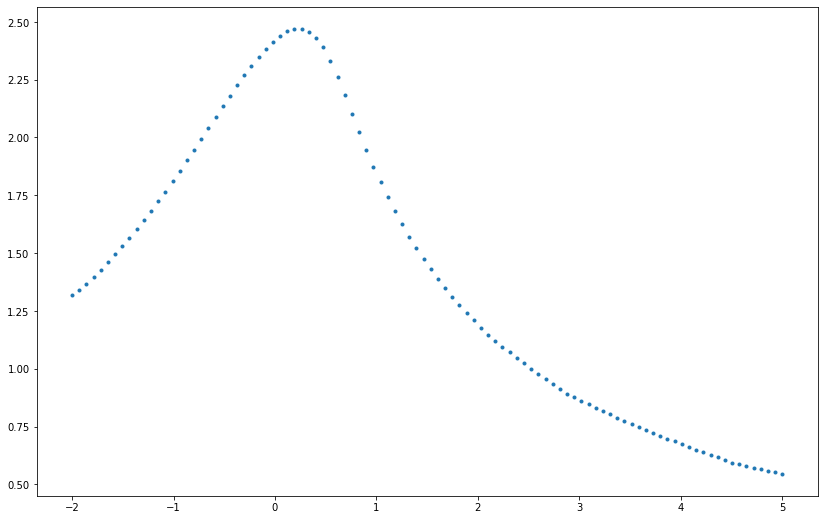

In [4]:
plt.figure(figsize=(14,9))
plt.plot(E,B,'.')
#plt.ylim(-5,5)

In [5]:
x=sol[:,0]
b=(np.max(x)-np.min(x))/2

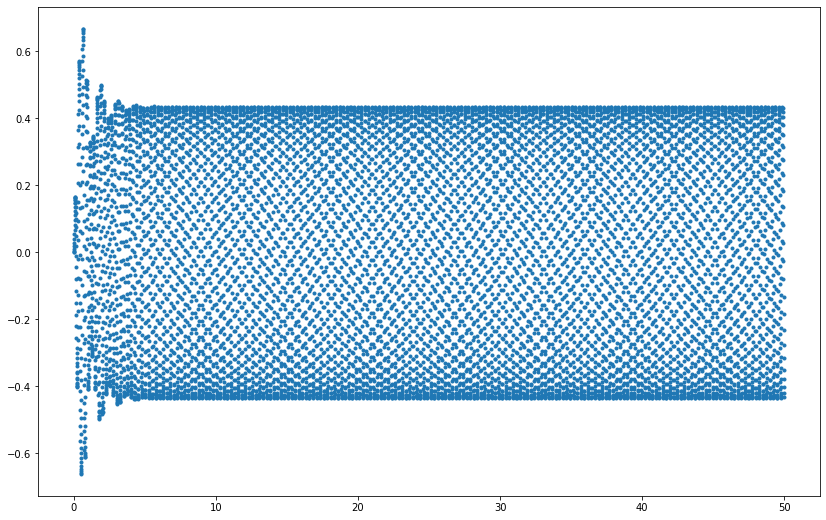

In [6]:
plt.figure(figsize=(14,9))
plt.plot(T,x,'.')

In [25]:
l=1
w=20
f=400
m=1
a=1
b=1

ec=0.1
d=2.7

def func(Y,t):
    x,v=Y
    dx=v
    dv=-2*l*v-(w**2)*x+(f/m)*np.cos((w+ec*t+d)*t)-a*x**2-b*x**3
    return np.array([dx,dv])


In [26]:
T=np.linspace(0,70,10000)
Y0=[0,0]

sol=odeint(func,Y0,T)
x=sol[:,0]


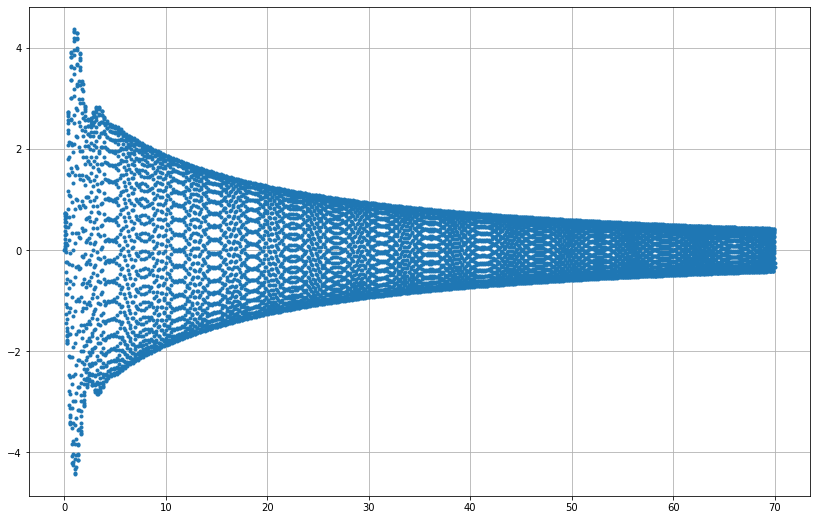

In [27]:
plt.figure(1,figsize=(14,9))
plt.plot(T,x,'.')
plt.xlim()
plt.grid()

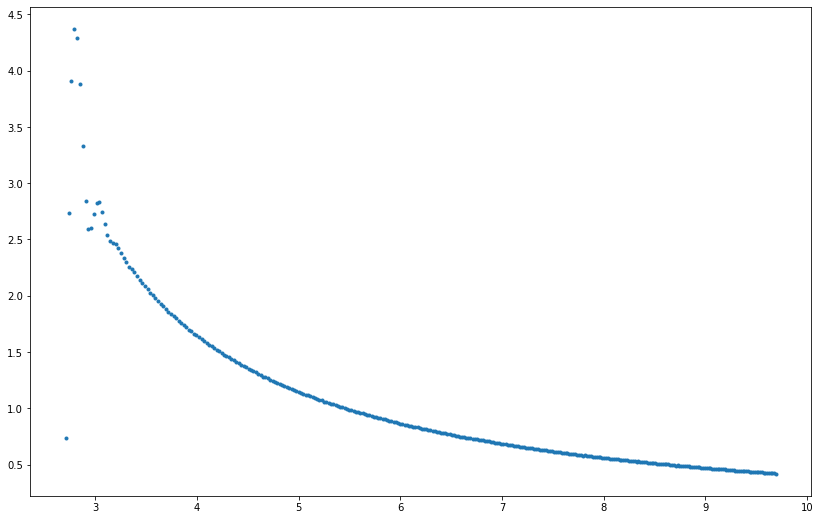

In [28]:
Xmax=[] #Corresponde con la amplitud
Xmin=[]

for i in range(1,len(x)-1):
    if x[i]>x[i-1] and x[i]>x[i+1]:
        Xmax.append(i)

Amp=x[Xmax]
plt.figure(figsize=(14,9))
plt.plot(ec*T[Xmax]+d,Amp,'.')

ValueError: x and y must have same first dimension, but have shapes (100001,) and (100000,)

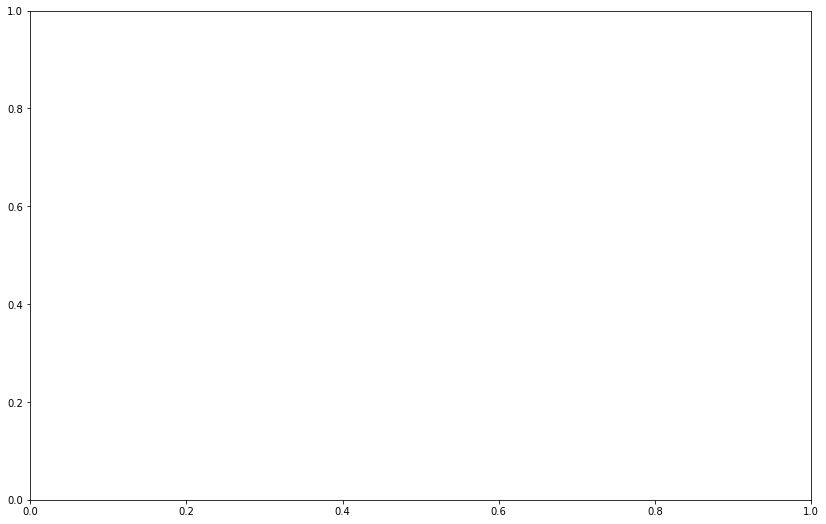

In [11]:
dt2=70/T.size
fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(x))*dt2)
w2 = np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*T.size)) # frecuencia
#w2 = 2*np.pi*np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*T.size)) # frecuencia angular

plt.figure(figsize=(14,9))
plt.plot(w2,abs(fw)/np.max(abs(fw)))
plt.xlim(0,20)
plt.grid()
w2[np.where(fw==np.max(fw))]

In [ ]:
np.mean(x)
#plt.figure(figsize=(14,9))
#plt.plot(E,B,'.')
#plt.ylim(-5,5)

In [ ]:
l=1
w=20
f=400
m=1
a=1
b=1

ec=-0.1
d=4

In [ ]:
sol=odeint(func,Y0,T)
x=sol[:,0]


In [ ]:
plt.figure(1,figsize=(14,9))
plt.plot(T,x,'.')
plt.xlim()
plt.grid()

In [ ]:
l=1
w=20
f=400
m=1
a=1
b=1

ec=0.1
d=2.7

In [ ]:
sol=odeint(func,Y0,T)
x=sol[:,0]

In [ ]:
plt.figure(1,figsize=(14,9))
plt.plot(T,x,'.')
plt.xlim()
plt.grid()

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

fk=lambda m,w,l,b,a: (32*(m**2)*(w**2)*(l**3)/(3*(3**0.5)*abs(3*b/(8*w)-5*a**2/(12*w**2))))**0.5

def Parametrico(Y0,C,T):
    #Y0: condiciones iniciales. Lista [x,v]
    #C lista de constantes de la ED. C=[l,w,f,m,a,b,ec,d]
    
    
    l=C[0]
    w=C[1]
    f=C[2]
    m=C[3]
    a=C[4]
    b=C[5]
    
    
    
    ec=C[6] #Positivo si viene de -inf. Negativo si viene de inf
    d=C[7] #Epsilon inicial
    
    def func(Y,t):
        x,v=Y
        dx=v
        dv=-2*l*v-(w**2)*x+(f/m)*np.cos((w+ec*t+d)*t)-a*x**2-b*x**3
        return np.array([dx,dv])

    sol=odeint(func,Y0,T)
    x=sol[:,0]
    
    plt.figure(1,figsize=(14,9))
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Posición [m]")
    plt.plot(T,x,'-')
    plt.grid()
    
    Xmax=[] #Corresponde con la posición de la amplitud (máximos)

    for i in range(1,len(x)-1):
        if x[i]>x[i-1] and x[i]>x[i+1]:
            Xmax.append(i)

    Amp=x[Xmax]
    plt.figure(2,figsize=(14,9))
    plt.plot(ec*T[Xmax]+d,Amp,'.')
    plt.xlabel("$\epsilon$ [m]")
    plt.ylabel("Amplitud [m]")
    plt.grid()
    print(fk(m,w,l,b,a))

372.97111562982894


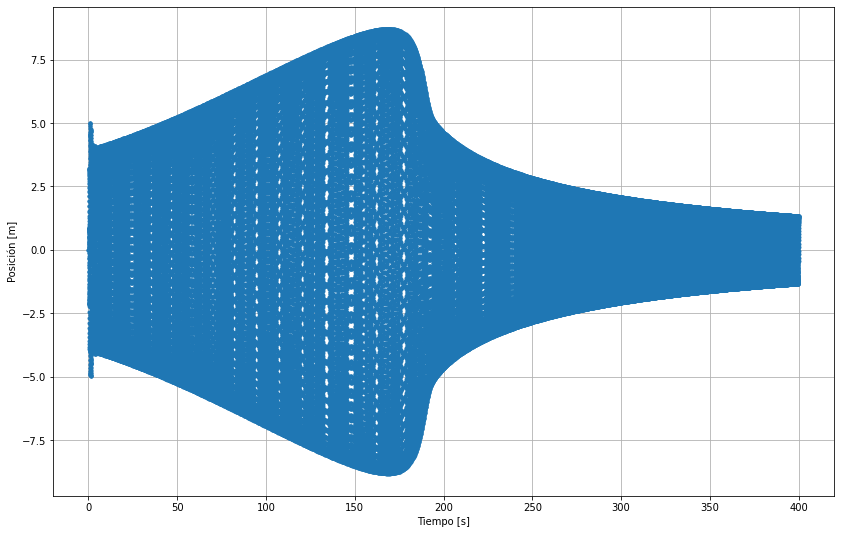

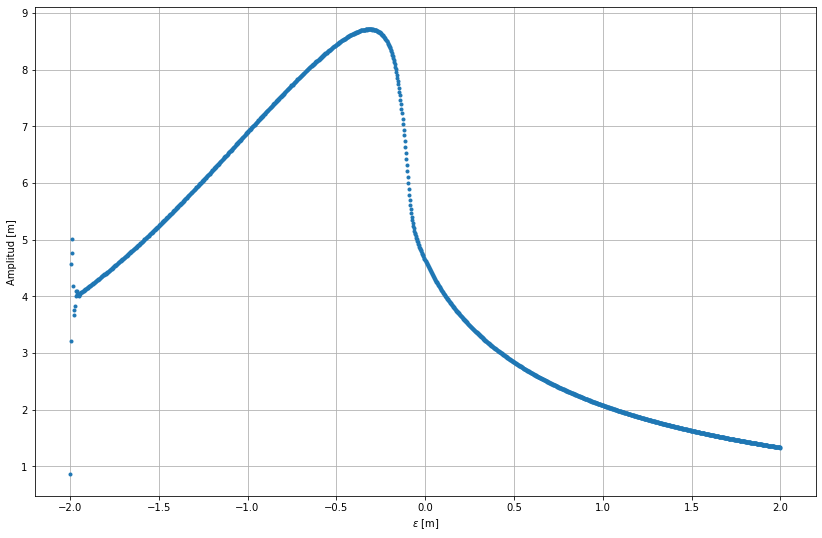

In [32]:
Parametrico([0,0],[1,20,372.9711,1,1,1,0.01,-2],np.linspace(0,400,100000))

372.97111562982894


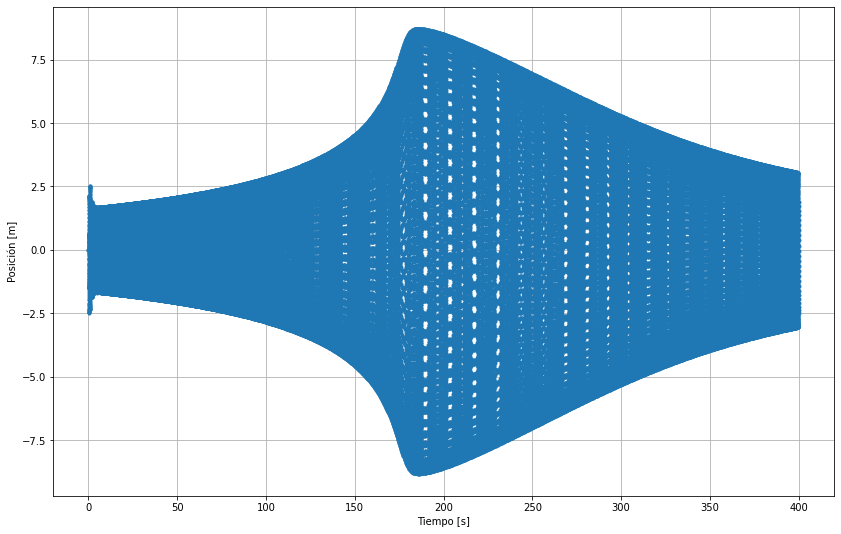

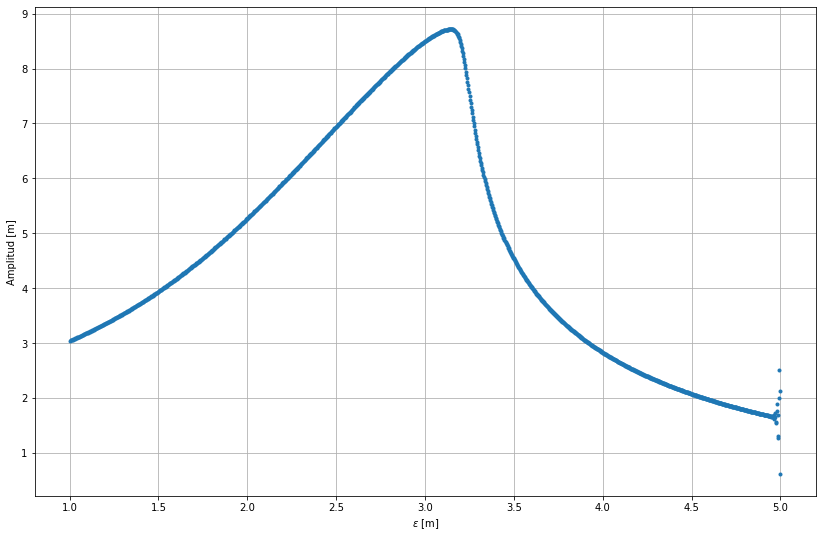

In [39]:
Parametrico([0,0],[1,20,372.9711,1,1,1,-0.01,5],np.linspace(0,400,100000))

372.97111562982894


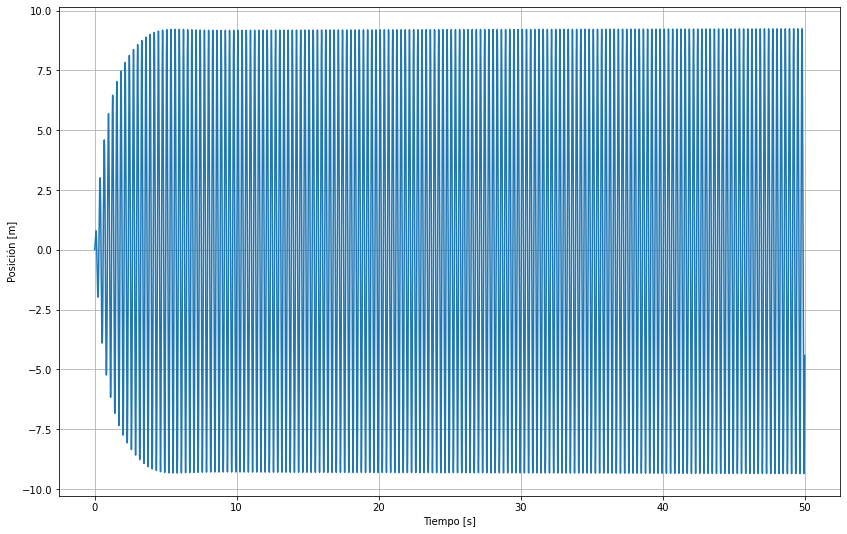

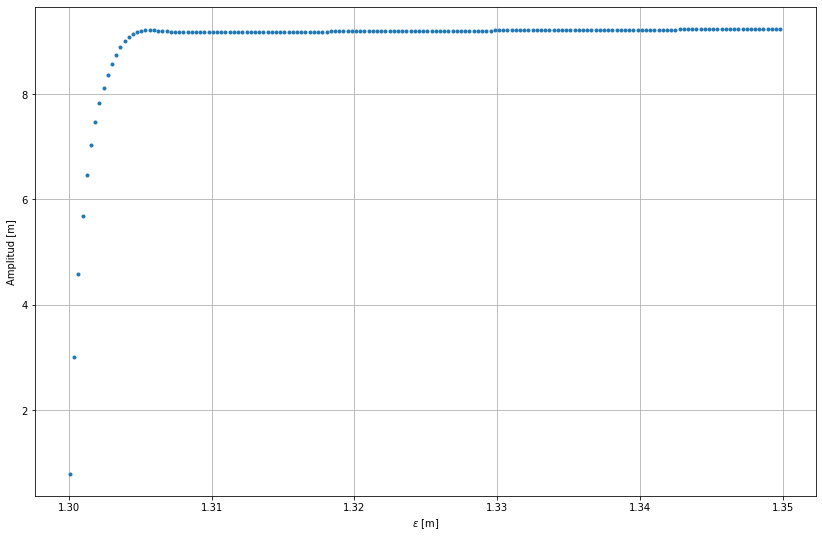

In [65]:
Parametrico([0,0],[1,20,400,1,1,1,0.001,1.3],np.linspace(0,50,1000000))

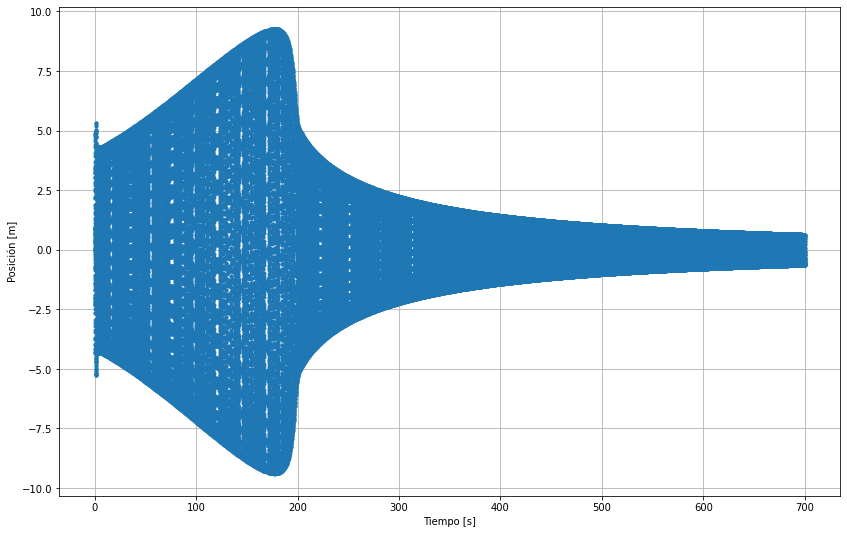

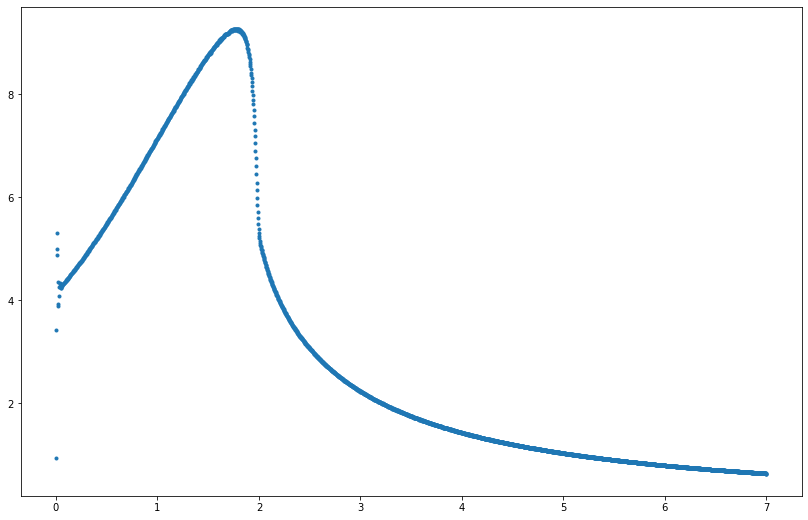

In [20]:
Parametrico([0,0],[1,20,400,1,1,1,0.01,0])